In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
XT = pd.read_csv('Diabetes_XTrain.csv')
YT = pd.read_csv('Diabetes_YTrain.csv')
Xt = pd.read_csv('Diabetes_Xtest.csv')

In [30]:
XT.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [68]:
Xt.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,180,90,26,90,36.5,0.314,35
1,2,93,64,32,160,38.0,0.674,23
2,2,114,68,22,0,28.7,0.092,25
3,13,76,60,0,0,32.8,0.180,41
4,1,80,74,11,60,30.0,0.527,22


In [41]:
YT.head()

,Outcome
0,1
1,0
2,1
3,1
4,0


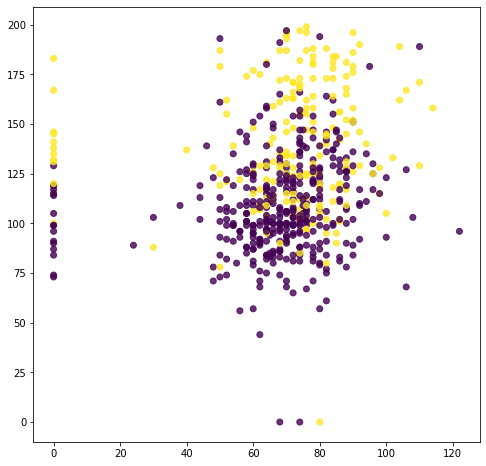

In [42]:
plt.figure(figsize=(8,8))
plt.scatter(XT['BloodPressure'],XT['Glucose'],c=[YT],alpha=0.8)
plt.show()

In [81]:
# def dist(x1,x2):
#     return np.sqrt(sum(x1-x2)**2)
    
# def knn(X,Y,querypoint,k=5):
#     vals = []
#     m = X.shape[0]
    
#     for i in range(m):
#         d = dist(querypoint,X[i])
#         vals.append((d,Y[i]))
        
#     vals = sorted(vals)
#     vals = vals[:k]
    
#     vals = np.array(vals)
     
# #     prediction = pd.DataFrame(vals)
# #     prediction.columns = (['distance','nearest'])
    
# #     return (int(prediction['nearest'].value_counts().idxmax()))
    
#     new_vals = np.unique(vals[:,1],return_counts=True)
# #     print(new_vals)
#     index = new_vals[1].argmax()
#     pred = new_vals[0][index]
#     return pred

In [82]:
# prediction = knn(XT,YT,Xt.iloc[0:1])
# prediction

In [114]:
from sklearn.neighbors import KNeighborsClassifier
kmodel = KNeighborsClassifier(n_neighbors=6)

In [115]:
kmodel.fit(XT,YT)

D:\MiniConda\Data_Science_and_machine_learning\env\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=6)

In [116]:
prediction = kmodel.predict(Xt)

In [117]:
pred = pd.DataFrame(prediction)
pred.columns = ['outcome']

In [118]:
pred.to_csv('Diabetes_Ytest.csv',index=False)

In [119]:
prediction

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

In [121]:
kmodel.score(XT,YT)*100

79.6875